In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [247]:
# Import and read the data
City_data = pd.read_csv('../MatPlotLibHW/city_data.csv')
Ride_data = pd.read_csv('../MatPlotLibHW/Ride_data.csv')

City_data.head(), Ride_data.head()

(             city  driver_count   type
 0      Kelseyland            63  Urban
 1      Nguyenbury             8  Urban
 2    East Douglas            12  Urban
 3   West Dawnfurt            34  Urban
 4  Rodriguezburgh            52  Urban,
           city                 date   fare        ride_id
 0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
 1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
 2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
 3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
 4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673)

In [248]:
#Merging the Data by City

CityRide_df = pd.merge(City_data, Ride_data, on='city', how='outer')

del CityRide_df['ride_id']

CityRide_df.head()

,city,driver_count,type,date,fare
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91


In [249]:
# Adding Total Rides Count to DF
CityRide_df['ride_count'] = CityRide_df.groupby('city')['city'].transform('count')

CityRide_df.head()


,city,driver_count,type,date,fare,ride_count
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,28
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,28
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,28
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,28
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,28


In [250]:
# Groupby City name


CityGroup = CityRide_df.groupby(['city', 'type']).mean()

CityGroup.head()


,,driver_count,fare,ride_count
city,type,,,
Alvarezhaven,Urban,21,23.928710,31
Alyssaberg,Urban,67,20.609615,26
Anitamouth,Suburban,16,37.315556,9
Antoniomouth,Urban,21,23.625000,22
Aprilchester,Urban,49,21.981579,19


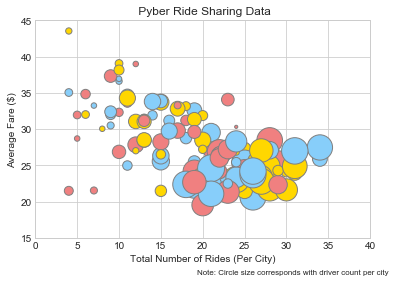

In [281]:
# Create Bubble Chart with Data

colors = ["Gold", "LightSkyBlue", "LightCoral"]

CityGroup.plot(kind="scatter", x="ride_count", y="fare", s=CityGroup["driver_count"]*10, c=colors, edgecolors="grey", title=" Pyber Ride Sharing Data")
plt.style.use('seaborn-whitegrid')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.figtext(0.5, 0,"Note: Circle size corresponds with driver count per city", wrap=True,
            horizontalalignment='left', fontsize=8)
plt.legend()
plt.ylim(15,45)
plt.xlim(0,40)

plt.show()


In [271]:
#Pie Chart by City TYpe
CityType_df = CityRide_df.groupby(['type']).sum()

CityType_df

,driver_count,fare,ride_count
type,,,
Rural,727,4255.09,1015
Suburban,9730,20335.69,13475
Urban,64501,40078.34,41251


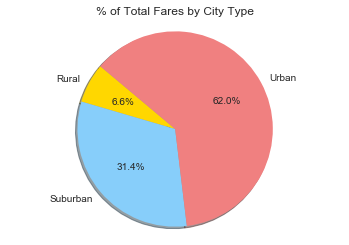

In [272]:
plt.title("% of Total Fares by City Type")
CityType = ["Rural", "Suburban", "Urban"]
TotalFares = [4255, 20335, 40078]
colors = ["Gold", "LightSkyBlue", "LightCoral"]

plt.pie(TotalFares, labels=CityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

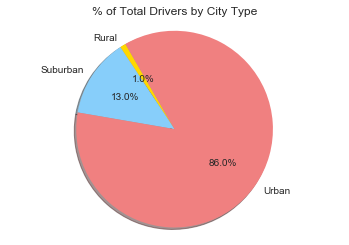

In [284]:
plt.title("% of Total Drivers by City Type")
CityType = ["Rural", "Suburban", "Urban"]
TotalDrivers = [727, 9730, 64501]
colors = ["Gold", "LightSkyBlue", "LightCoral"]

plt.pie(TotalDrivers, labels=CityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

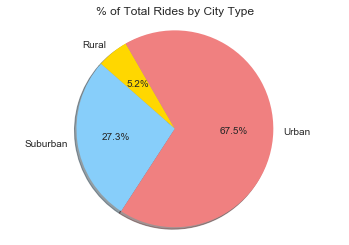

In [282]:

CityType = ["Rural", "Suburban", "Urban"]
TotalRides = [125, 657, 1625]
colors = ["Gold", "LightSkyBlue", "LightCoral"]

plt.title("% of Total Rides by City Type")
plt.pie(TotalRides, labels=CityType, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()